# AS HW1

김보람  
2023-03-29

# 1번

원점을 지나는 회귀모형은 다음과 같이 정의할 수 있다.

$$y_i = β_1x_i + ϵ_i,  ϵ_i ∼_{i.i.d.} N(0, σ^2), i = 1, \dots , n$$

## (1)

오차제곱합을 정의하고 $β_1$의 최소제곱추정량 $(\hatβ_1)$을 구하여라.

$S=\sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n (y_i-\beta_1 x_i)^2 = \sum(y_i^2 + \beta_1^2 x_i^2 -2 \beta_1 x_i y_i)$

$\widehat \beta_1 = argmin \sum_{i=1}^n(y_i - \beta_1 x_i)^2$

$\dfrac{\partial S}{\partial \beta_1}= -2 \sum_{i=1}^n x_i(y_i-\beta_1 x_i)$

= $\sum x_iy_i - \beta_1 \sum x_i^2 = 0$

$\therefore \widehat \beta_1 = \dfrac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$

## (2)

$E(\hatβ_1)$을 구하여라.

$a_i = \dfrac{x_i}{\sum_{i=1}^n x_i^2}$라고 놓자.

즉, $\widehat \beta_1 = \sum_{i=1}^n a_i y_i$

$E(\widehat \beta_1)= E(\sum_{i=1}^n a_i y_i) = \sum_{i=1}^n a_i E(y_i)=\sum_{i=1}^n a_i E(\beta_1 x_i + \epsilon_i)=\sum_{i=1}^n a_i \beta_1 x_i = \dfrac{\sum_{i=1}^n x_i^2}{\sum_{i=1}^n x_i^2} \beta_1 = \beta_1$

$E(\hatβ_1)=\beta_1$이므로 불편추정량

## (3)

$Var(\hatβ_1)$을 구하여라.

$Var(\widehat \beta_1)= Var(\sum_{i=1}^n a_i y_i) = \sum_{i=1}^n a_i^2 Var(y_i)=\dfrac{\sigma^2}{\sum_{i=1}^n x_i^2}$

$\because Var(y_i) = \sigma^2$

## (4)

제곱합에 대한 분산분석표를 작성하여라.

| 요인 | 제곱합(SS) | 자유도(df) |      평균제곱(MS)      |       $F_0$        |    유의확률     |
|:----:|:--------:|:--------:|:-----------------:|:--------------:|:------------:|
| 회귀 |   $SSR$    |     1      |  $MSR=\dfrac{SSR}{1}$  | $\dfrac{MSR}{MSE}$ | $P(F \geq F_0)$ |
| 잔차 |   $SSE$    |   $n-1$    | $MSE=\dfrac{SSE}{n-1}$ |                    |                 |
|  계  |   $SST$    |    $n$     |                        |                    |                 |

$SSR=\sum_{i=1}^n (\widehat y_i)^2 = \sum (\widehat \beta_1 x_i)^2 = \widehat \beta_1^2 \sum x_i^2$

$SSE=\sum_{i=1}^n(y_i - \widehat y)^2 = \sum(y_i - \widehat \beta_1 x_i)^2 = \sum y_i^2 - SSR$

$SST=SSE+SSR=\sum y_i^2$

절편이 없는 모형은 평균이 0인 느낌

$R^2=\dfrac{\sum \widehat y_i^2}{\sum y_i^2}$

## (5)

회귀모형의 유의성 검정을 하기 위한 가설을 설정하고, 검정통계량을
제시하여라.

-   가설 $H_0: \beta_1 = 0 \ vs \ H_1:\beta_1 \neq 0$

-   검정통계량
    $F=\dfrac{MSR}{MSE}=\dfrac{SSR/1}{SSE/(n-1)} \sim_{H_0} F(1,n-1)$

## (6)

위의 가설에 대해, 유의수준 $α$에서 검정하는 방법을 기술하여라.

$F_0 > F_\alpha(1,n-1)$이면 귀무가설을 기각(유의함)하고 그 외는
귀무가설을 채택

혹은,

유의확률 = $P(F>F_0) < \alpha \to H_0$기각

유의확률 = $P(F>F_0) > \alpha \to H_0$기각못함

## (7)

다음의 가설에 대한 검정통계량을 제시하고, 유의수준 $α$에서 가설 검정하는
방법을 기술하여라.

$$H_0 : β_1 = 0        \  vs   \      H_1 : β_1 > 0$$

검정통계량
$T=\dfrac{\widehat \beta_1 - 0}{\widehat{s.e}(\widehat \beta_1)} \sim_{H_0} t(n-1)$

$s.e(\widehat \beta_1)=\sqrt{Var(\widehat \beta_1)} = \dfrac{\sigma}{\sqrt{\sum x_i^2}}$

$\widehat{s.e}(\widehat \beta_1)= \sqrt{\dfrac{\hat {\sigma^2}}{\sum x_i^2}}, {\hat \sigma^2}=MSE$
\$

유의확률 = $P(T > t_0) < \alpha \to H_0$기각

혹은

$t_0>t_{\alpha}(n-1) \to H_0$ 기각

$t_0<t_{\alpha}(n-1) \to H_0$ 기각 못함

# 2번

‘cars.csv’ 데이터를 이용하여 회귀모형을 적합하려고 한다.

이는 자동차의 속도(mph)에 따른 제동거리(ft)를 조사한 데이터이다.

다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는 유의수준 $α = 0.05$
사용)

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
read_csv('cars')

## (1) 산점도

이 데이터의 산점도를 그리고 두 변수 사이의 관계를 설명하시오.

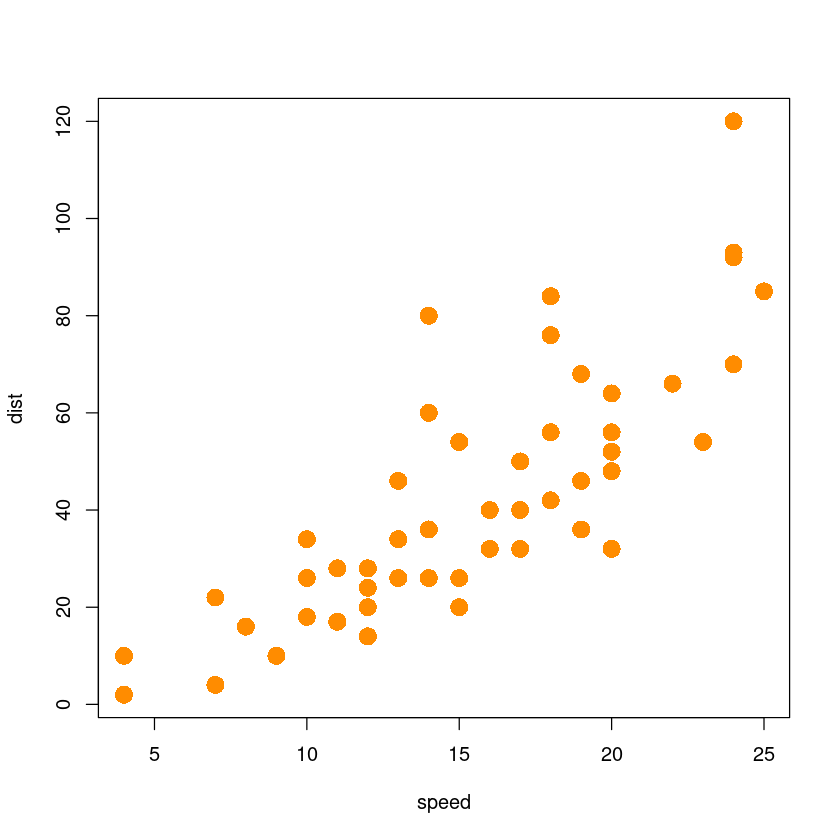

In [40]:
plot(dist~speed,
     data=cars,
     xlab="speed",
     ylab="dist",
     pch=16,
     cex=2,
     col="darkorange")

-   두 변수 사이에 선형관계가 있어 보인다.

## (2) 회귀직선

최소제곱법의 의한 회귀직선을 적합시키시키고, 모형 적합 결과를
설명하시오.

In [97]:
dt <- data.frame(
  i = 1:nrow(cars),
  x = cars$speed,
  y = cars$dist,
  x_barx = cars$speed - mean(cars$speed),
  y_bary = cars$dist - mean(cars$dist)) 
dt


In [98]:
dt$x_barx2 <- dt$x_barx^2
dt$y_bary2 <- dt$y_bary^2
dt$x_barxy_bary <-dt$x_barx * dt$y_bary
dt

In [100]:
colSums(dt)

$\beta_1 = \dfrac{S_{xy}}{S_{xx}}$

$\beta_0 = \bar y - \beta_1 \bar x$

In [102]:
beta1 <- as.numeric(colSums(dt)[8]/colSums(dt)[6])
beta0 <- mean(cars$dist) - beta1 * mean(cars$speed)
beta1
beta0

In [41]:
model <- lm(dist~speed, cars)
model

In [42]:
summary(model)

-   p-value의 값이 1.49$e^{-12}$로 0.05보다 작아 유의하다.

-   F검정은 89.57

-   $\mathbb{R^2}$는 0.6511

-   $\beta_0, \beta_1$의 p-value값은 유의하다.

## (3) 산점도 위에 회귀직선

데이터의 산점도를 그리고 추정한 회귀직선을 (1)에서 그린 산점도 위에
그리시오.

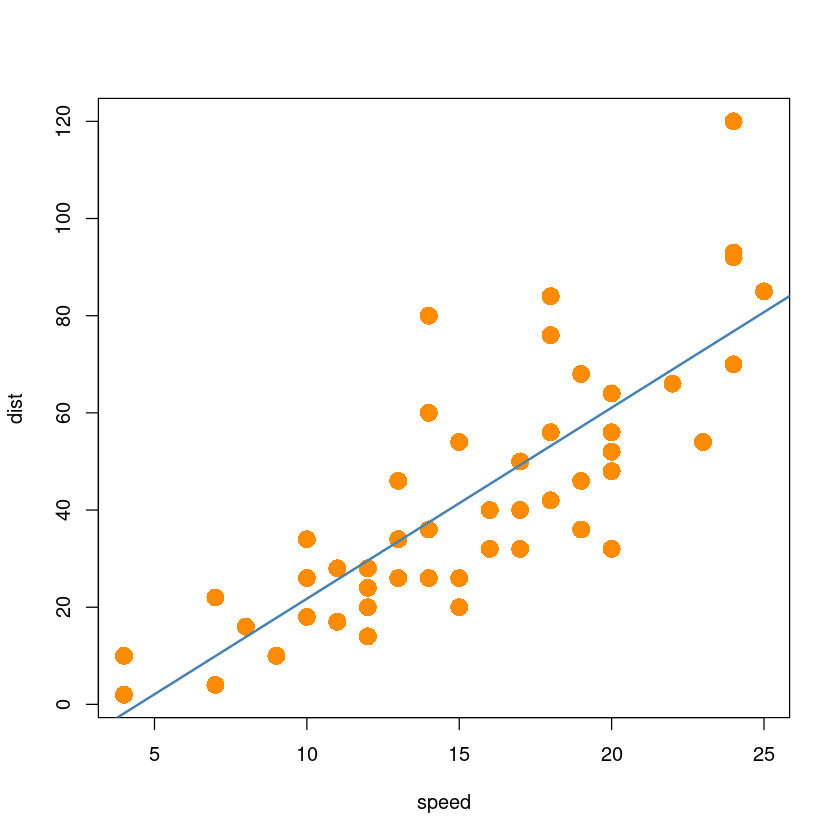

In [103]:
plot(dist~speed,
     data=cars,
     xlab="speed",
     ylab="dist",
     pch=16,
     cex=2,
     col="darkorange")
abline(model, col='steelblue', lwd=2)

## (4) 분산분석

분산분석표를 작성하고 회귀직선의 유의 여부를 검정하시오.

In [44]:
anova(model)

-   가정: $H_0: \beta_1 = 0$ vs $H_1: \beta_1 \neq 0$

In [45]:
qf(0.95,1,48)

-   $F_0 > F_{0.05}(0.95,1,48) = 4.04$ 이므로 귀무가설을 기각할 수 잇다.
    즉 회귀직선이 유의하다.

## (5) 결정계수, 상관계수

결정계수와 상관계수를 구하고 이 둘의 관계를 설명하시오.

$\mathbb{R^2} = \dfrac{SSR}{SST} = \dfrac{21185.46}{32538.98} = 0.651079413060889$

`-` 결정계수 직접계산

In [104]:
SST = sum((dt$y- mean(dt$y))^2)
SSR = sum(((-17.57909 + 3.932409*dt$x)-mean(dt$y))^2)

In [106]:
SST
SSR

In [107]:
R2=SSR/SST
R2

`-` 결정계수 코드

In [69]:
summary(model)$r.squared

$r_{xy} = \dfrac{S_{xy}}{\sqrt{S{(xx)}S{(yy)}}}$

In [108]:
Sxy <- sum((dt$x - mean(dt$x))*(dt$y - mean(dt$y)))
Sxx <- sum((dt$x - mean(dt$x))^2)
Syy <- sum((dt$y - mean(dt$y))^2)

In [109]:
rxy<-Sxy/sqrt(Sxx*Syy)

In [110]:
rxy**2

단순선형회귀모형에서는 표본상관계수와 결정계수가 같다.

$\mathbb{R^2} = r_{xy}^2$

## (6) 개별 회귀계수 유의성검정

$β_0, β_1$에 대한 개별 회귀계수의 유의성검정을 수행하시오.

가설 $H_0: \beta_1 = 0$ vs $H_1: not H_0$

`-` 직접구현

In [112]:
SSE=SST-SSR
MSE=SSE/48

In [113]:
tvalue1 = beta1/(sqrt((MSE/sum((dt$x-mean(dt$x))^2))))
tvalue1

In [114]:
tvalue0 = beta0/(sqrt((MSE*((1/48)+((mean(dt$x))^2/sum((dt$x-mean(dt$x))^2))))))
tvalue0


`-` 코드구현

In [115]:
summary(model)$coef

`-` 결과

In [50]:
qt(0.975,48)

In [117]:
qt(0.025,48)

-   $\beta_0$에 대한 $t-vlaue$값이 $-2.601058$

-   $\beta_1$에 대한 $t-vlaue$값이 $9.463990$

-   $\beta_0, \beta_1$의 t-value는 유의수준 $\alpha=0.05$에서의
    $tvalue=-2.011$보다 크기 때문에 유의하다. 즉 귀무가설을 기각한다.
    $\beta_0, \beta_1$은 모두 0이 아니다.

## (7) 개별 회귀계수 신뢰구간

$β_0, β_1$에 대한 90% 신뢰구간을 구하시오.

$$\widehat \beta_0 \pm t_{\alpha/2}(n-2) \widehat \sigma \sqrt{\dfrac{1}{n}+\dfrac{\bar x^2}{S_{xx}}}$$

$$\widehat \beta_1 \pm t_{\alpha/2}(n-2) \dfrac{\widehat \sigma}{\sqrt{S_{xx}}}$$

-   함수사용

In [53]:
confint(model, level=0.9)

-   직접계산

In [54]:
coef(model) + qt(0.95, 48) * summary(model)$coef[,2]

In [55]:
coef(model) - qt(0.95, 48) * summary(model)$coef[,2]

## (8) 평균반응, 신뢰구간

속도가 18.5mph 인 차량의 평균 제동거리를 예측하고, 95% 신뢰구간을
구하시오.

개별 speed = 18,5

In [125]:
new_speed <- data.frame(speed=18.5)

`-` 코드

In [126]:
model$coefficients[1] + model$coefficients[2]*18.5

In [122]:
predict(model, 
        newdata = new_speed,
        interval = c("confidence"),  #구간추정
        level = 0.95)  ##평균반응

`-` 직접계산

`-` 평균반응 추정량

$$\widehat \mu_0 = \widehat \beta_0 + \widehat \beta_1 x_0$$

In [127]:
mu0 = beta0+beta1*18.5
mu0


$$Var(\widehat\mu_0))=\sigma^2(\dfrac{1}{n} + \dfrac{(x_0 - \bar x)^2}{S_{xx}})$$

In [131]:
varmu=((MSE*((1/48)+((18.5-mean(dt$x))^2/sum((dt$x-mean(dt$x))^2)))))
semu=sqrt(varmu)

In [132]:
semu

In [133]:
mu0+qt(0.975,48)*semu    

In [134]:
mu0-qt(0.975,48)*semu          


## (9) 개별반응, 신뢰구간

속도가 18.5mph 인 차량의 개별 제동거리를 예측하고, 95% 신뢰구간을
구하시오.

`-` 코드

In [124]:
predict(model, newdata = new_speed, 
        interval = c("prediction"),  
        level = 0.95)  ## 개별 y

`-` 직접계산

In [136]:
vary0=MSE*(1+(1/48)+(18.5-mean(dt$x))^2/sum((dt$x-mean(dt$x))^2))
vary0

In [137]:
sqrt(vary0)

In [138]:
mu0+qt(0.975,48)*sqrt(vary0)

In [139]:
mu0-qt(0.975,48)*sqrt(vary0)

In [168]:
qt(0.95,8)

## (10) 원점 지나는 회귀직선

원점을 지나는 회귀직선을 구하시오.

`-` 코드

In [62]:
model2 <- lm(dist ~ 0 + speed, cars)
summary(model2)

$\widehat {dist} = 2.9091 \widehat {speed}$

`-` 직접계산

In [141]:
beta1_0 <- sum(dt$x * dt$y)/sum((dt$x^2))
beta1_0 

## (11) 원점 지나는 회귀계수 신뢰구간

위 회귀직선에서 회귀계수(기울기)의 90% 신뢰구간을 구하시오.

`-`코드

In [70]:
confint(model2, level=0.9)

`-` 직접계산

In [143]:
colSums(dt)[6] #Sxx

In [146]:
SSR_0 = sum(((2.909132*dt$x))^2 )

In [147]:
SSE_0 = sum((dt$y - 2.909132*dt$x)^2)

In [148]:
SST_0 = sum(dt$y^2)

In [149]:
MSE_0 = SSE_0/49

In [150]:
sigma_0 = sqrt(MSE_0)

In [158]:
beta1_0 + qt(0.95,49) * sigma_0/sqrt(1370)

In [159]:
beta1_0 - qt(0.95,49) * sigma_0/sqrt(1370)

In [160]:
 qt(0.95,49)

## (12) 원점 지난 회귀직선 분산분석

원점을 지나는 회귀직선에 대한 분산분석표를 작성하고, 회귀직선의 유의
여부를 검정하시오.

In [63]:
anova(model2)

-   가정: $H_0: \beta_1 = 0$ vs $H_1: \beta_1 \neq 0$

In [71]:
qf(0.95,1,49)

-   $F_0 > F_{0.05}(0.95,1,49) = 4.04$ 이므로 귀무가설을 기각할 수 잇다.
    즉 회귀직선이 유의하다.

## (13) 원점 지나는 회귀직선 결정계수

원점을 지나는 회귀직선의 결정계수를 구하시오.

`-` 코드

In [64]:
summary(model2)$r.squared

`-` 직접계산

In [161]:
SSR_0/SST_0


## (14) 회귀직선 결과 비교

원점을 포함한 회귀직선과 포함하지 않은 회귀직선의 결과를 비교하여라.

In [66]:
summary(model)$r.squared
summary(model2)$r.squared

원점을 포함한 회귀직선의 R스퀘어값이 더 크므로 model2가 더 좋은 것 같다.

## (15) 잔차 산점도

잔차에 대한 산점도를 그리고, 결과를 설명하여라.

In [84]:
cars$disthat <- model$fitted
cars$resid <- model$residuals

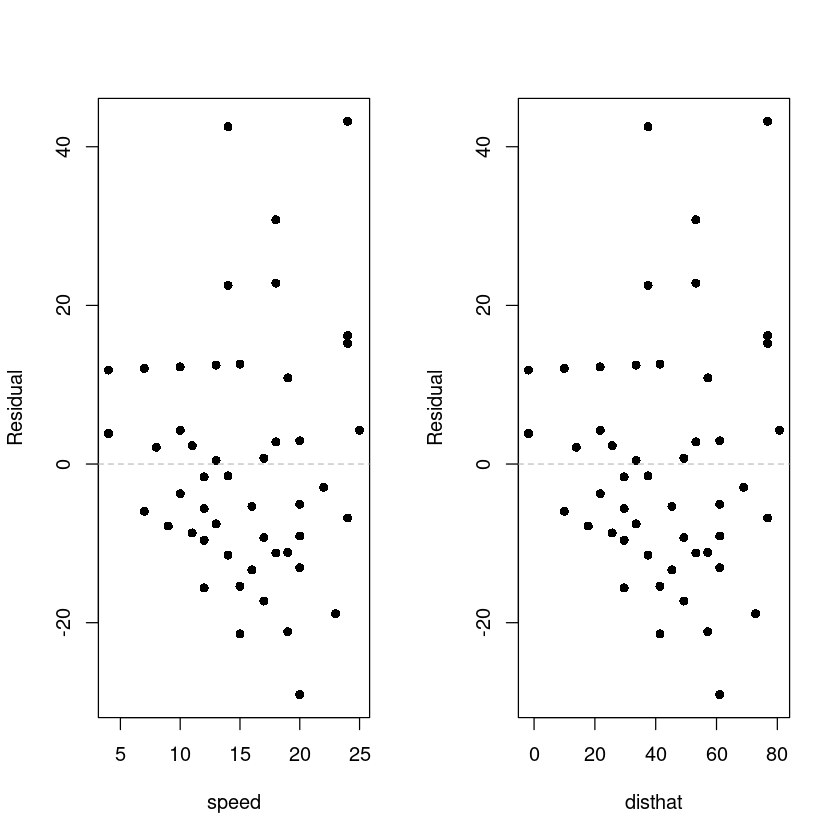

In [85]:
par(mfrow=c(1,2))
plot(resid ~ speed, cars, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
plot(resid ~ disthat, cars, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

## (16) 잔차 등분산성 검정

잔차에 대한 등분산성 검정을 수행하시오.

가설:

In [164]:
bptest(model)

## (17) 잔차 정규성 검정

잔차에 대한 히스토그램, QQ plot을 그리고, 정규성 검정을 수행하여라.

가설:

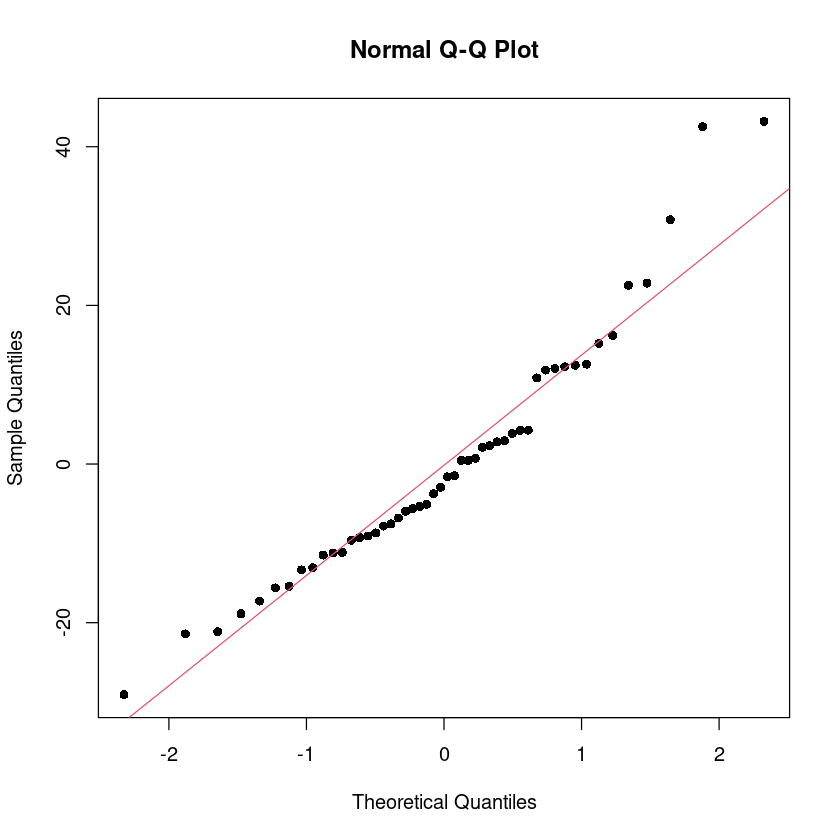

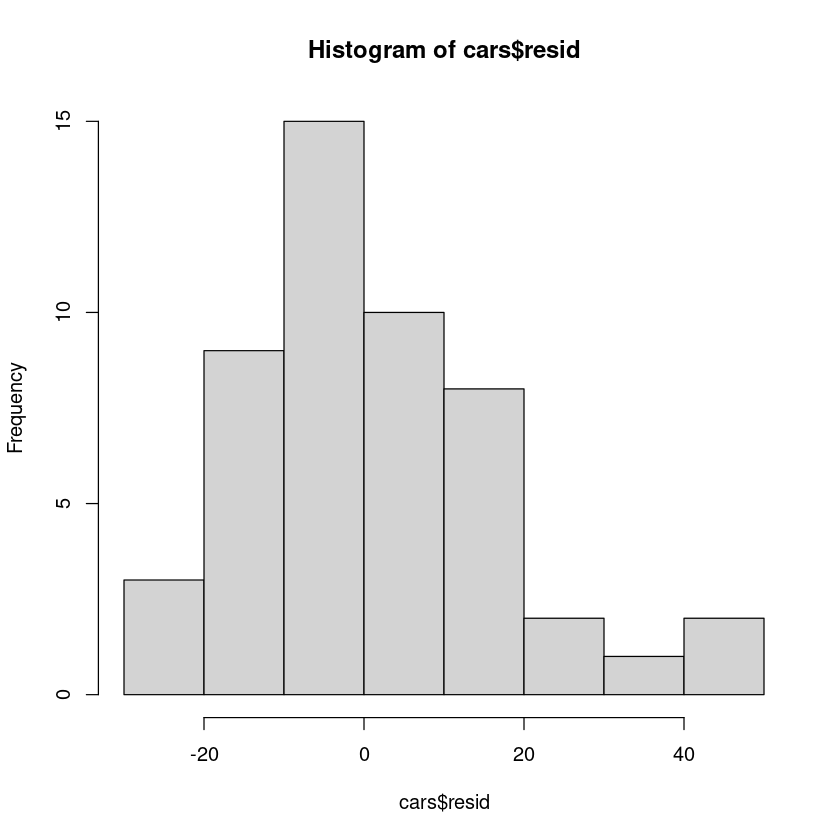

In [90]:
qqnorm(cars$resid, pch=16)
qqline(cars$resid, col=2)

hist(cars$resid)

In [91]:
shapiro.test(resid(model))

-   $H_0$: 정규성 만족, $H_1$: 정규성만족X

-   p-value의 값이 0.05 보다 작으므로 귀무가설을 기각

## (18) 잔차 독립성 검정

잔차에 대한 독립성 검정을 수행하시오.

In [92]:
dwtest(model, alternative = "two.sided")  #H0 : uncorrelated vs H1 : rho != 0

-   DW TEST의 p-value=0.1904이므로 H0를 기각할 수 없다. 채택. 즉 서로
    독립이다.

In [93]:
dwtest(model, alternative = "greater")  #H0 : uncorrelated vs H1 : rho > 0

In [94]:
dwtest(model, alternative = "less")     #H0 : uncorrelated vs H1 : rho < 0